# Classification_items_with_description
* Robin Masliah

In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from langdetect import detect
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import sys

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder

ps = PorterStemmer()
from nltk.corpus import stopwords
stop = set(stopwords.words('english')).union(
    set(stopwords.words('spanish'))).union(
    set(stopwords.words('french'))).union(
    set(stopwords.words('german')))

In [3]:
def tokenize_stem(sentence):
    
    sentence = sentence.lower()

    stemmed = []
    words = word_tokenize(sentence)
    for w in words:
        stemmed.append(ps.stem(w))
        
    return stemmed

def detect_lang(sentence):
    try:
        language = detect(sentence)
    except:
        language = "error"
    return language

def join_tokens_list(tokens_list):
    return " ".join(tokens_list)

def build_vocab_category(liste_words):
     return list(set(word_tokenize(' '.join(liste_words))))
    
def getKeysByValue(dictOfElements, valueToFind):
    for code, name in json_vocab.items():
        if valueToFind in name:
            return code
        
def most_common(lst):
    return max(set(lst), key=lst.count)

def length(text):
    return len(text)

In [36]:
df['category_cleaned'] = df['category'].apply(lambda x: x.replace('_', ' ').lower())
df['data_cleaned'] = df['searchterm'].parallel_apply(tokenize_stem)
df['vector'] = df['searchterm'].apply(lambda x: nlp(x).vector)

In [46]:
df.to_csv('data_cleaned.csv')

# Load Data

In [152]:
df = pd.read_csv('data_cleaned.csv', index_col=[0])
del df['searchterm_cleaned']

In [34]:
df.shape

(4130459, 3)

In [35]:
df['searchterm'] = df['searchterm'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop)]))

In [36]:
df['searchterm_token'] = df['searchterm'].apply(lambda x: word_tokenize(x))

<Figure size 1080x720 with 0 Axes>

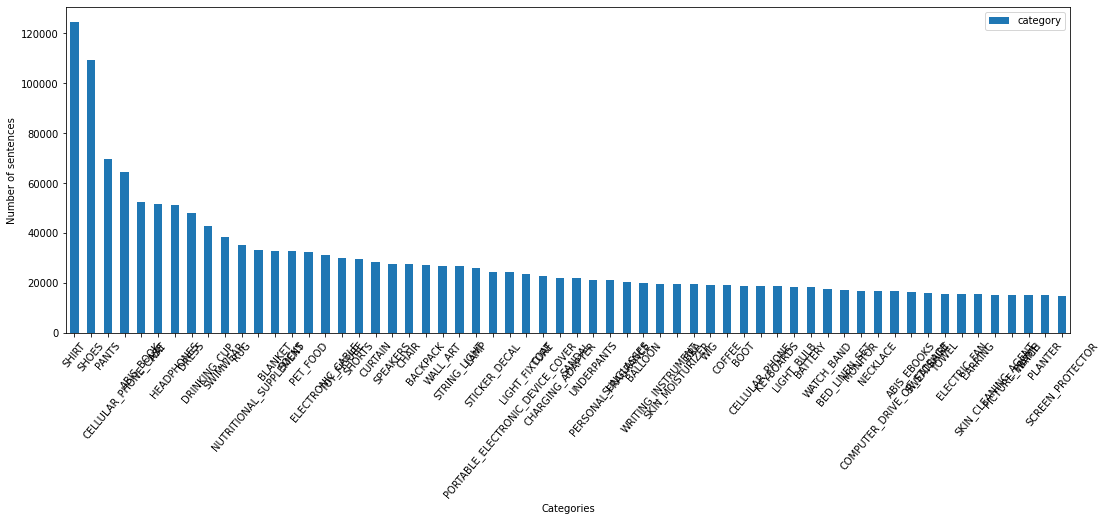

In [113]:
count = df.category.value_counts()
count = pd.DataFrame(count)
count = count.head(60)

plt.figure(figsize=(15,10))
count.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Categories")
plt.ylabel("Number of sentences")
plt.show()

In [98]:
df['length'] = df['searchterm'].apply(lambda x: length(x))

In [99]:
df

,searchterm,category,category_cleaned,searchterm_token,length
0,countertop epoxy paint kit,PAINT,paint,"[countertop, epoxy, paint, kit]",26
1,dallas cowboys blanket plush,BLANKET,blanket,"[dallas, cowboys, blanket, plush]",28
2,ph neutral floor cleaner luxury vinyl,CLEANING_AGENT,cleaning agent,"[ph, neutral, floor, cleaner, luxury, vinyl]",37
3,tenis skechers mujer trabajar,SHOES,shoes,"[tenis, skechers, mujer, trabajar]",29
4,couch cushion replacement slipcovers,FURNITURE_COVER,furniture cover,"[couch, cushion, replacement, slipcovers]",36
...,...,...,...,...,...
4130454,arteza marker pens,MARKING_PEN,marking pen,"[arteza, marker, pens]",18
4130455,marcadores arteza,MARKING_PEN,marking pen,"[marcadores, arteza]",17
4130456,bolígrafos plus negro,WRITING_INSTRUMENT,writing instrument,"[bolígrafos, plus, negro]",21
4130457,amara panel wallpaper,WALLPAPER,wallpaper,"[amara, panel, wallpaper]",21


# Choose embedding or BOW 

* Visualization of the vectorizations countvectorizer and TF IDF with LSA

/Users/robinmasliah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/robinmasliah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


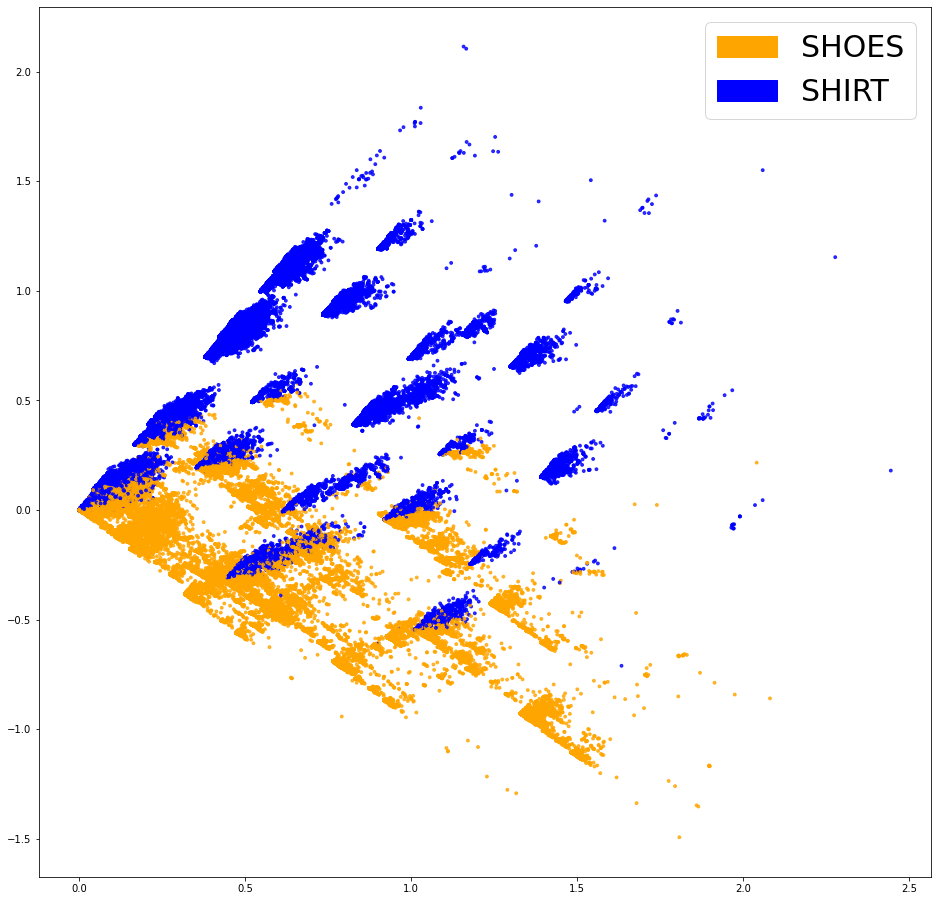

In [185]:
# Test LSA
## SHOES & SHIRT

lsa_df = df[(df['category'] == 'SHOES') | (df['category'] == 'SHIRT')]

encoder = LabelEncoder()
lsa_df["category"] = encoder.fit_transform(lsa_df[["category"]])

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = lsa_df["searchterm"].tolist()
list_labels = lsa_df["category"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=42)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)



def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='SHOES')
            blue_patch = mpatches.Patch(color='blue', label='SHIRT')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_counts, y_train)
plt.show()

/Users/robinmasliah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


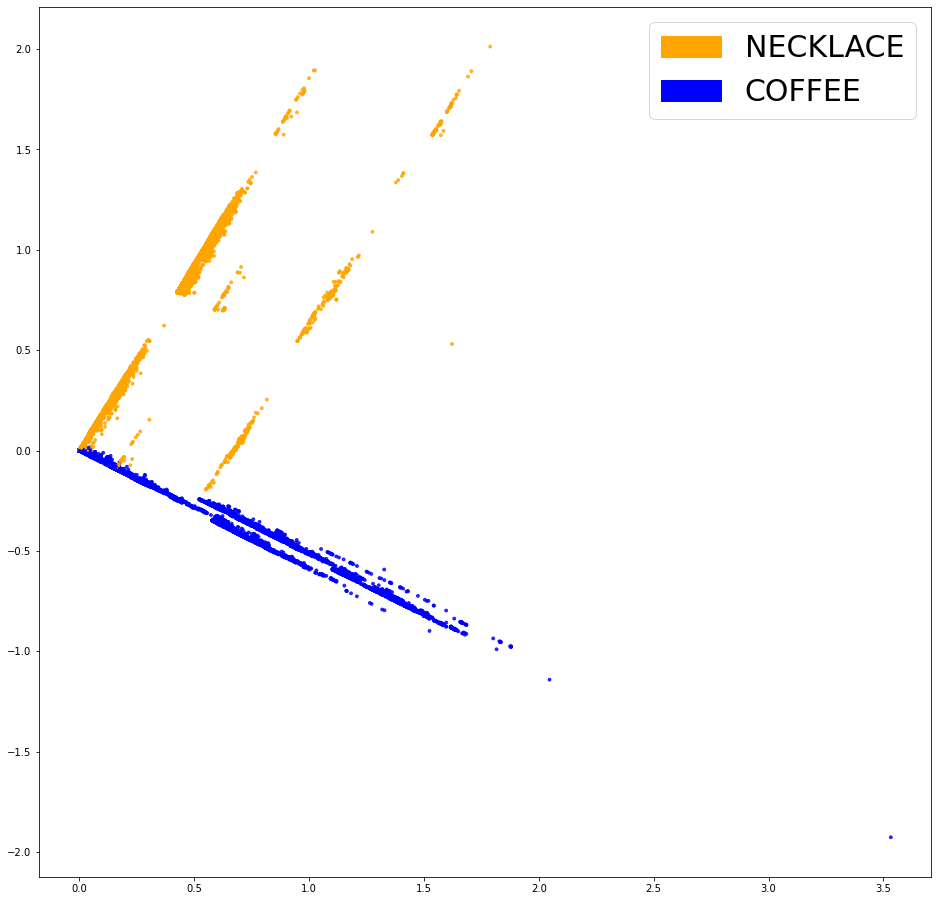

In [196]:
# Test LSA
## SHOES & SHIRT

lsa_df = df[(df['category'] == 'NECKLACE') | (df['category'] == 'COFFEE')]

encoder = LabelEncoder()
lsa_df["category"] = encoder.fit_transform(lsa_df[["category"]])

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = lsa_df["searchterm"].tolist()
list_labels = lsa_df["category"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=42)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)



def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='NECKLACE')
            blue_patch = mpatches.Patch(color='blue', label='COFFEE')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train_counts, y_train)
plt.show()

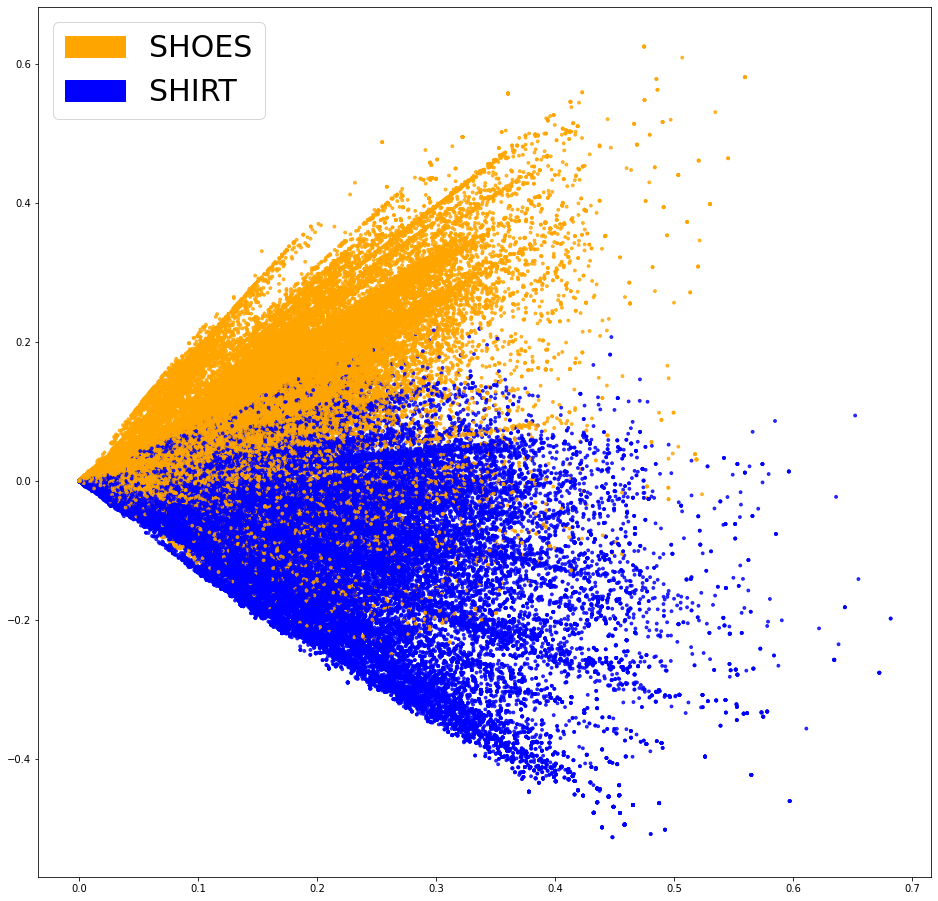

In [186]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

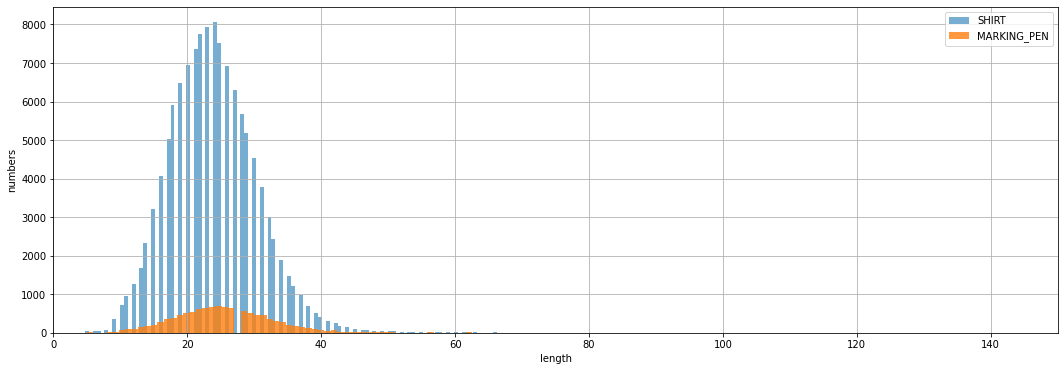

In [104]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 200
plt.hist(df[df['category'] == 'SHIRT']['length'], alpha=0.6, bins=bins, label='SHIRT')
plt.hist(df[df['category'] == 'MARKING_PEN']['length'], alpha=0.8, bins=bins, label='MARKING_PEN')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0, 150)
plt.grid()
plt.show()

### Some categorie's wordclouds

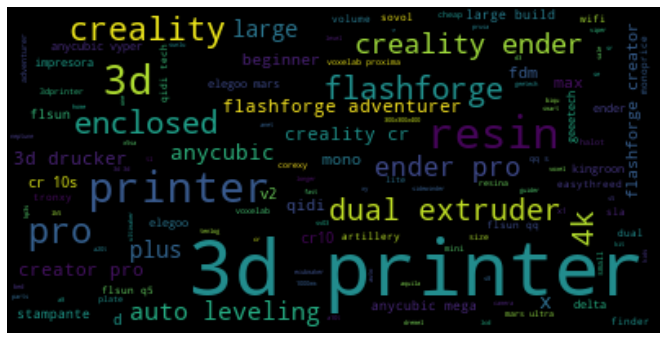

In [199]:
# Start with one review:
text = ' '.join(list(df['searchterm'][df['category'] == '3D_PRINTER'].values))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

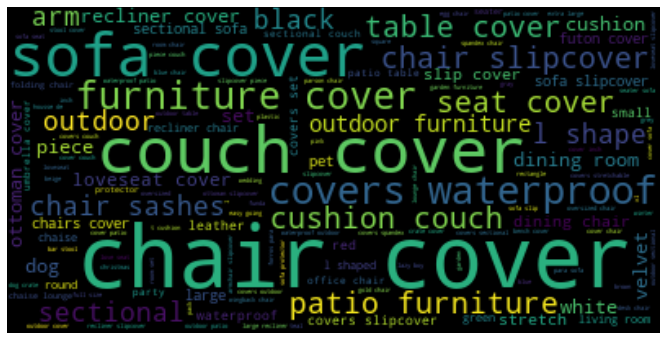

In [136]:
# Start with one review:
text = ' '.join(list(df['searchterm'][df['category'] == 'FURNITURE_COVER'].values))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

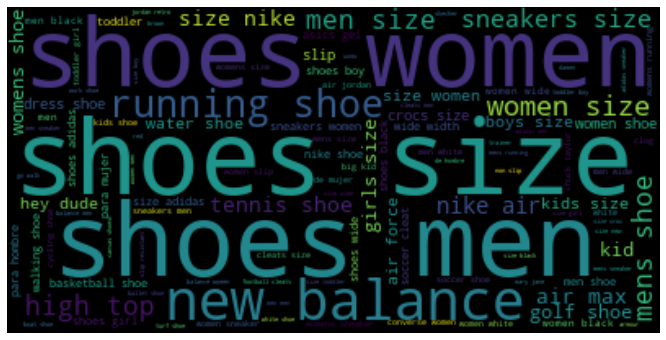

In [135]:
# Start with one review:
text = ' '.join(list(df['searchterm'][df['category'] == 'SHOES'].values))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* The answer is often in the sentence

# Choose data
* For computational issues I take only a sample of the data to train a classifier

In [9]:
counts = pd.DataFrame(df.category.value_counts())
sample = counts[((counts['category'] > 10000) & (counts['category'] < 10020)) |
      (counts['category'] <= 100)
    ]

sample = sample.reset_index()
sample.columns = ['category', 'count']
label = list(set(sample.category.values))

In [10]:
test = df[df['category'].isin(label)]

In [11]:
test

,searchterm,category,category_cleaned,searchterm_token
568,soldering iron station heat gun,SOLDERING_STATION,soldering station,"[soldering, iron, station, heat, gun]"
739,dac converter ps4,ELECTRONIC_SIGNAL_CONVERTER,electronic signal converter,"[dac, converter, ps4]"
2215,travel cornhole set adults,TARGET_TOSSING_GAME,target tossing game,"[travel, cornhole, set, adults]"
2283,dragon hotend high flow,MECHANICAL_COMPONENTS,mechanical components,"[dragon, hotend, high, flow]"
3066,anel douche travel,ENEMA_DOUCHE,enema douche,"[anel, douche, travel]"
...,...,...,...,...
4128623,coating thickness gauge f/nf,PRECISION_MEASURING,precision measuring,"[coating, thickness, gauge, f/nf]"
4128894,asurion protection plan cell phone,CONSUMER_ELECTRONICS,consumer electronics,"[asurion, protection, plan, cell, phone]"
4129377,popsocket pferd,PHONE_ACCESSORY,phone accessory,"[popsocket, pferd]"
4130105,baby musical instruments 1 year,MUSICAL_INSTRUMENT_TOY,musical instrument toy,"[baby, musical, instruments, 1, year]"


In [12]:
corpuses = df.groupby('category')['searchterm'].apply(list)
vocab_groups = pd.DataFrame(corpuses)

In [13]:
vocab_groups['searchterm'] = vocab_groups['searchterm'].apply(lambda x: build_vocab_category(x))

In [14]:
vocab_groups['searchterm'] = vocab_groups['searchterm'].apply(lambda x:
    [word for word in x if word not in (stop)])

In [15]:
json_vocab = vocab_groups.to_dict()

In [16]:
json_vocab = json_vocab['searchterm']

In [17]:
flat_list = [item for sublist in json_vocab.values() for item in sublist]

In [18]:
max_ = [] 
for w in ('abdominal roller coaster').split():
    for i in flat_list:
        if i in w:
            max_.append(getKeysByValue(json_vocab, i))

In [19]:
pd.Series(max_).value_counts(normalize=True)

ABIS_BOOK              0.751450
ABDOMINAL_EXERCISER    0.196355
ABIS_EBOOKS            0.023198
BAKING_PAPER           0.012428
CHAIR                  0.003314
ELECTRONIC_CABLE       0.002486
HAT                    0.001657
3D_PRINTER             0.001657
GREETING_CARD          0.001657
ORTHOPEDIC_BRACE       0.001657
PACKING_MATERIAL       0.000829
PET_FOOD               0.000829
FOOD_DEHYDRATOR        0.000829
HANGING_ROD            0.000829
MENSTRUAL_CUP          0.000829
dtype: float64

# Model

In [20]:
from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
test["category"] = encoder.fit_transform(test[["category"]])

/Users/robinmasliah/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/robinmasliah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
text = test[['searchterm', 'category']]
text = text.reset_index(drop=True)

In [24]:
text

,searchterm,category
0,soldering iron station heat gun,80
1,dac converter ps4,33
2,travel cornhole set adults,85
3,dragon hotend high flow,56
4,anel douche travel,35
...,...,...
6624,coating thickness gauge f/nf,66
6625,asurion protection plan cell phone,21
6626,popsocket pferd,59
6627,baby musical instruments 1 year,57


# GloVe embedding

In [25]:
def create_corpus_new(text):
    corpus = []
    for line in tqdm(text):
        words = [word.lower() for word in word_tokenize(line)]
        corpus.append(words)
    return corpus   

corpus = create_corpus_new(text['searchterm'])

embedding_dict = {}
with open('../glove.6B.100d.txt','r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
f.close()

MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

corpus_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')


word_index = tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, 100))

for word,i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec 

100%|██████████| 6629/6629 [00:00<00:00, 12766.27it/s]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(corpus_pad, text['category'].values, test_size=0.3)
print('Shape of train', X_train.shape)
print("Shape of Validation ", X_test.shape)

Shape of train (4640, 50)
Shape of Validation  (1989, 50)


In [32]:
xgb = XGBClassifier(max_depth=5,
                    learning_rate=0.1,
                    n_estimators=180)

xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=5)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_probas = xgb.predict_proba(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_xgb))
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_xgb)

Accuracy: 0.755


# Regroup labels

* "SHOES" and "SHIRT" are 2 labels with same quantity of lines and should have close vectors in embeddings
* Use meanings and synonyms

In [203]:
from nltk.corpus import wordnet as wn
from itertools import product

wordx, wordy = "SHOES", "SHIRT"
sem1, sem2 = wn.synsets(wordx), wn.synsets(wordy)

for i, j in list(product(*[sem1, sem2])):
    score = i.wup_similarity(j)
print('Score wup similarity SHOES and SHIRT =', score)

wordx, wordy = "SHOES", "NECKLACE"
sem1, sem2 = wn.synsets(wordx), wn.synsets(wordy)

for i, j in list(product(*[sem1, sem2])):
    score = i.wup_similarity(j)
print('Score wup similarity SHOES and NECKLACE =', score)

Score wup similarity SHOES and SHIRT = 0.75
Score wup similarity SHOES and NECKLACE = 0.13333333333333333


In [157]:
labels = list(set(df.category_cleaned))

In [183]:
final = []
for wordx in labels:
    temp = []
    for wordy in labels:
        if len(wordx.split()) == 1 and len(wordy.split()) == 1:

            sem1, sem2 = wn.synsets(wordx), wn.synsets(wordy)

            for i, j in list(product(*[sem1, sem2])):
                score = i.wup_similarity(j)
            
            if score >= 0.75 and wordx!=wordy:
                print(wordx, wordy, score)
                temp.append(wordx)
                temp.append(wordy)
                temp = list(set(temp))
    final.append(temp)

tablecloth pillowcase 0.8181818181818182
beer screwdriver 0.782608695652174
vase teapot 0.8
vase bathtub 0.8421052631578947
vase handbag 0.7777777777777778
vase cistern 0.7619047619047619
washer refrigerator 0.9166666666666666
washer washers 1.0
washer freezer 0.8461538461538461
washer toaster 0.8333333333333334
earplug dehumidifier 1.0
pastry pretzel 0.75
pastry seafood 0.7692307692307693
awning teether 1.0
ashtray casseroles 0.7777777777777778
ashtray planter 0.7777777777777778
ashtray bathtub 0.7777777777777778
ashtray envelope 0.7777777777777778
ashtray handbag 0.8235294117647058
ashtray wallet 0.7777777777777778
ashtray stroller 0.7777777777777778
ashtray tray 0.8888888888888888
hat curtain 0.75
television scanner 0.7619047619047619
tools motherboard 1.0
broom playard 1.0
casseroles ashtray 0.7777777777777778
casseroles planter 0.7777777777777778
casseroles bathtub 0.7777777777777778
casseroles envelope 0.7777777777777778
casseroles chopstick 0.8
casseroles flatware 0.761904761904

washers freezer 0.8461538461538461
washers toaster 0.8333333333333334
handlebar eraser 0.8235294117647058
insulation toilet 0.7777777777777778
insulation treadmill 0.75
underwear swimwear 0.8571428571428571
underwear leotard 0.8571428571428571
underwear underpants 0.9090909090909091
underwear bra 0.9090909090909091
underwear kurta 0.8181818181818182
underwear sweatshirt 0.782608695652174
underwear suspender 0.7619047619047619
underwear pajamas 0.7619047619047619
underwear necktie 0.8181818181818182
underwear sleepwear 0.8
underwear blazer 0.75
underwear helmet 0.7619047619047619
bra swimwear 0.8571428571428571
bra leotard 0.8571428571428571
bra overalls 0.7619047619047619
bra underpants 0.9090909090909091
bra underwear 0.9090909090909091
bra saree 0.8571428571428571
bra humidifier 0.8571428571428571
bra kurta 0.8181818181818182
bra grocery 0.7777777777777778
bra earmuff 0.75
bra sweatshirt 0.782608695652174
bra suspender 0.8
bra pajamas 0.8
bra necktie 0.8181818181818182
bra tights 0.7

pajamas suspender 0.8
pajamas necktie 0.7619047619047619
pajamas tights 0.7619047619047619
pajamas sleepwear 0.9473684210526315
pajamas helmet 0.8
wheelchair dresser 0.7619047619047619
wheelchair desk 0.7619047619047619
wheelchair lamp 0.8
wheelchair sofa 0.8571428571428571
wheelchair footrest 0.8181818181818182
wheelchair furniture 0.8421052631578947
plectrum calculator 0.8235294117647058
plectrum rug 0.75
plectrum bookend 0.8235294117647058
plectrum rangefinder 0.7777777777777778
plectrum thermometer 0.7777777777777778
plectrum cooktop 0.7777777777777778
plectrum pacifier 0.875
plectrum capacitor 0.8235294117647058
plectrum printer 0.8235294117647058
plectrum handbag 0.75
plectrum trivet 0.7777777777777778
plectrum carburetor 0.7777777777777778
plectrum kettlebell 0.7777777777777778
plectrum magnifier 0.7777777777777778
plectrum stapler 0.8235294117647058
plectrum keyboards 0.7777777777777778
plectrum condom 0.8235294117647058
plectrum muffler 0.875
plectrum pinboard 0.875
plectrum s

stroller tray 0.7777777777777778
cistern vase 0.7619047619047619
cistern teapot 0.7619047619047619
cistern bathtub 0.8
puppet sandbox 0.8
puppet playhouse 0.8
puppet pinata 0.8
ramp placemat 1.0
coat cake 1.0
barbell trampoline 0.8
respirator lampshade 0.7777777777777778
respirator earmuff 0.75
respirator cabinet 0.7777777777777778
tray ashtray 0.8888888888888888
tray casseroles 0.7777777777777778
tray planter 0.7777777777777778
tray bathtub 0.7777777777777778
tray envelope 0.7777777777777778
tray handbag 0.8235294117647058
tray wallet 0.7777777777777778
tray stroller 0.7777777777777778
carabiner sweatband 0.8235294117647058
carabiner gaskets 0.8571428571428571
carabiner pacifier 0.7777777777777778
carabiner plectrum 0.7777777777777778
carabiner muffler 0.7777777777777778
carabiner pinboard 0.7777777777777778
carabiner doorstop 0.8
kitchen vivarium 0.7777777777777778
kitchen door 0.8888888888888888
scanner television 0.7619047619047619
scanner camcorder 0.7619047619047619
toaster washe

In [175]:
for i in final:
    if i == []:
        final.remove(i)

In [179]:
final

[['tablecloth', 'pillowcase'],
 ['bathtub', 'vase'],
 ['washer', 'toaster', 'freezer', 'washers', 'refrigerator'],
 ['dehumidifier', 'earplug'],
 ['teether', 'awning'],
 ['ashtray', 'handbag', 'tray'],
 ['motherboard', 'tools'],
 ['playard', 'broom'],
 ['casseroles', 'handbag'],
 ['sander',
  'printer',
  'plectrum',
  'stapler',
  'pacifier',
  'muffler',
  'pinboard',
  'calculator'],
 ['underwear',
  'underpants',
  'necktie',
  'kurta',
  'bra',
  'leotard',
  'swimwear',
  'sweatshirt',
  'sleepwear'],
 ['chainsaw', 'sander'],
 ['sweatband', 'carabiner'],
 ['bathtub', 'teapot'],
 ['necklace', 'jewelry', 'bracelet', 'earring'],
 ['planter', 'handbag'],
 ['figurine', 'globe'],
 ['stroller', 'bassinet'],
 ['dresser', 'lamp', 'furniture'],
 ['conditioner', 'fertilizer'],
 ['washer', 'toaster', 'freezer', 'washers', 'refrigerator'],
 ['bathtub', 'teapot', 'handbag', 'vase'],
 ['lamp', 'furniture', 'desk', 'workbench'],
 ['lamp', 'furniture', 'rug'],
 ['underwear',
  'underpants',
  'ne

# Room for improvment

* Calculate precision for each class predicted
* Parallelization of calculous
* Regroup labels with close vocabulary at started above
* Try to train embedding on all the dataset
* See the difference of precision on the sentences that contain te label and not
* Implement feature of meaning and synonyms for the classifier for a hybrid approach